In [ ]:
import torch
from torch import nn as nn # for NN
from torch.utils.data import Dataset # class to create dataset class
from torch import optim # Optimizer (for optimizing neural networks)
from torch.nn import functional as F # activation functions
import matplotlib.pyplot as plt # to plot a graph
import pandas as pd # py data analysis

In [1]:
import torch

## 1. Creating the DataSet class

In [3]:
from torch.utils.data import Dataset
import pandas as pd

In [10]:
class DataSet(Dataset):
    def __init__(self, path):
        self.dataset = torch.tensor(pd.read_csv(path).values)

    def __len__(self):
        return len(self.dataset)
    
    def __getitem__(self, i):
        return self.dataset[i, :-1], self.dataset[i, -1]

## 2. Implementing the NeuralNetwork class

In [5]:
from torch import nn as nn

In [37]:
class NeuralNetwork(nn.Module):
    def __init__(self, n_features):
        super().__init__()
        
        self.n_features = n_features

        # creating the layers
        self.fc1 = nn.Linear(self.n_features, 32)
        self.fc2 = nn.Linear(32, 64)
        self.fc3 = nn.Linear(64, 1) # classification problem (1 output layer)

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.relu(self.fc2(out))
        out = F.sigmoid(self.fc3(out))

        return out


## 3. Implementing the training loop with a learning curve plot

In [8]:
from torch import optim
from torch.nn import functional as F
import matplotlib.pyplot as plt

In [38]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [40]:
def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader, print_plot=True):
    train_accuracy = torch.zeros(n_epochs)
    test_accuracy = torch.zeros(n_epochs)

    for epoch in range(n_epochs):
        for example, label in train_loader:
            example = example.to(DEVICE)
            label = label.to(DEVICE)

            # return a list instead of a list of one element lists
            label = label.unsqueeze(1)

            output = model(example.float())
            loss = loss_fn(output, label.float())

            optimizer.zero_grad() # zero gradient (make errors to be 0)
            loss.backward()
            optimizer.step() # change weights

        with torch.no_grad():
            for loader, accuracy in [(train_loader, train_accuracy), (test_loader, test_accuracy)]:
                correct = 0
                total = 0

                for examples, labels in loader:
                    examples = examples.to(DEVICE)
                    labels = labels.to(DEVICE).view(-1, 1)

                    outputs = model(examples.float())
                    predicted = torch.round(outputs)

                    total += labels.shape[0]
                    correct += (predicted == labels).sum()
                
                accuracy[epoch] = correct / total
            
            if (epoch + 1) % 10 == 0:
                print(f'Epoch {epoch+1})', 
                    f'Train Accuracy: {train_accuracy[epoch]}',
                    f'Test Accuracy: {test_accuracy[epoch]}')
        
    if print_plot:
        epochs = range(n_epochs)

        plt.plot(epochs, train_accuracy, 'g', label='Training accuracy')
        plt.plot(epochs, test_accuracy, 'b', label='Test accuracy')
        plt.title('Training and Test loss')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

## 4. Experimenting with the model

In [12]:
from torch.utils.data import random_split, DataLoader

In [35]:
def train(model, n_epochs, learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader)

In [52]:
def get_model():
    data = DataSet(r'.\diabetes.csv')

    n_samples = len(data)
    n_test = int(0.2 * n_samples) # 80% : 20% split

    # splitting the dataset into training and testing
    train_data, test_data = random_split(data, [n_samples - n_test, n_test])

    # creating batches
    train_loader = DataLoader(train_data, batch_size=len(train_data))
    test_loader = DataLoader(test_data, batch_size=len(test_data))

    # creating the model
    model = NeuralNetwork(len(data[0][0])).to(DEVICE)

    loss_fn = nn.BCELoss()

    return model, loss_fn, train_loader, test_loader

In [53]:
def train(n_epochs, learning_rate):
    model, loss_fn, train_loader, test_loader = get_model()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    training_loop(n_epochs, optimizer, model, loss_fn, train_loader, test_loader)

Training the neural network with different learning rates and different number of epochs.

C:\Users\Denny\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.642276406288147 Test Accuracy: 0.673202633857727
Epoch 20) Train Accuracy: 0.577235758304596 Test Accuracy: 0.5228758454322815
Epoch 30) Train Accuracy: 0.6666666865348816 Test Accuracy: 0.6405228972434998
Epoch 40) Train Accuracy: 0.6650406718254089 Test Accuracy: 0.6535947918891907
Epoch 50) Train Accuracy: 0.712195098400116 Test Accuracy: 0.6535947918891907
Epoch 60) Train Accuracy: 0.7284553050994873 Test Accuracy: 0.6601307392120361
Epoch 70) Train Accuracy: 0.7512195110321045 Test Accuracy: 0.6601307392120361
Epoch 80) Train Accuracy: 0.7560975551605225 Test Accuracy: 0.6928104758262634
Epoch 90) Train Accuracy: 0.7577235698699951 Test Accuracy: 0.686274528503418
Epoch 100) Train Accuracy: 0.767479658126831 Test Accuracy: 0.7058823704719543


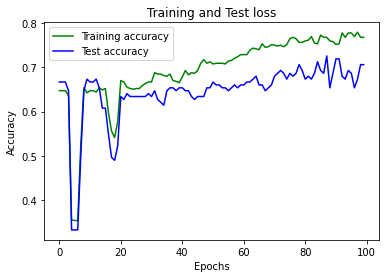

In [54]:
train(100, 0.01)

The results are ok. But can we do better ? Let's try for 200 epochs or 500 epochs.

C:\Users\Denny\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.4829268157482147 Test Accuracy: 0.529411792755127
Epoch 20) Train Accuracy: 0.6390243768692017 Test Accuracy: 0.6797385811805725
Epoch 30) Train Accuracy: 0.6585366129875183 Test Accuracy: 0.6666666865348816
Epoch 40) Train Accuracy: 0.6975609660148621 Test Accuracy: 0.6993464231491089
Epoch 50) Train Accuracy: 0.7089430689811707 Test Accuracy: 0.7254902124404907
Epoch 60) Train Accuracy: 0.712195098400116 Test Accuracy: 0.7189542651176453
Epoch 70) Train Accuracy: 0.7268292903900146 Test Accuracy: 0.7450980544090271
Epoch 80) Train Accuracy: 0.7382113933563232 Test Accuracy: 0.7516340017318726
Epoch 90) Train Accuracy: 0.7349593639373779 Test Accuracy: 0.7647058963775635
Epoch 100) Train Accuracy: 0.7365853786468506 Test Accuracy: 0.758169949054718
Epoch 110) Train Accuracy: 0.7577235698699951 Test Accuracy: 0.7450980544090271
Epoch 120) Train Accuracy: 0.7609755992889404 Test Accuracy: 0.7516340017318726
Epoch 130) Train Accuracy: 0.767479658126831 Test Ac

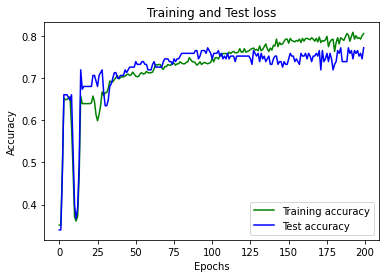

In [61]:
train(200, 0.01)

C:\Users\Denny\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.4943089485168457 Test Accuracy: 0.3986928164958954
Epoch 20) Train Accuracy: 0.6634146571159363 Test Accuracy: 0.6339869499206543
Epoch 30) Train Accuracy: 0.6878048777580261 Test Accuracy: 0.5882353186607361
Epoch 40) Train Accuracy: 0.6910569071769714 Test Accuracy: 0.5686274766921997
Epoch 50) Train Accuracy: 0.720325231552124 Test Accuracy: 0.5947712659835815
Epoch 60) Train Accuracy: 0.7235772609710693 Test Accuracy: 0.5882353186607361
Epoch 70) Train Accuracy: 0.7333333492279053 Test Accuracy: 0.6143791079521179
Epoch 80) Train Accuracy: 0.7349593639373779 Test Accuracy: 0.6339869499206543
Epoch 90) Train Accuracy: 0.7414634227752686 Test Accuracy: 0.6209150552749634
Epoch 100) Train Accuracy: 0.7333333492279053 Test Accuracy: 0.6274510025978088
Epoch 110) Train Accuracy: 0.7447154521942139 Test Accuracy: 0.6339869499206543
Epoch 120) Train Accuracy: 0.7479674816131592 Test Accuracy: 0.6339869499206543
Epoch 130) Train Accuracy: 0.7577235698699951 Test

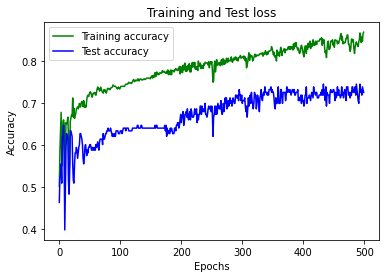

In [62]:
train(500, 0.01)

For 200 epochs we get a lower train accuracy and a better test accuracy than 500 epochs. Also 200 epochs give better overall results compared to 100 epochs.

What if we lower the learning rate ?

C:\Users\Denny\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.6276422739028931 Test Accuracy: 0.6339869499206543
Epoch 20) Train Accuracy: 0.6585366129875183 Test Accuracy: 0.6601307392120361
Epoch 30) Train Accuracy: 0.6715447306632996 Test Accuracy: 0.5947712659835815
Epoch 40) Train Accuracy: 0.6829268336296082 Test Accuracy: 0.6993464231491089
Epoch 50) Train Accuracy: 0.7056910395622253 Test Accuracy: 0.6666666865348816
Epoch 60) Train Accuracy: 0.707317054271698 Test Accuracy: 0.6993464231491089
Epoch 70) Train Accuracy: 0.7105690836906433 Test Accuracy: 0.6797385811805725
Epoch 80) Train Accuracy: 0.712195098400116 Test Accuracy: 0.686274528503418
Epoch 90) Train Accuracy: 0.712195098400116 Test Accuracy: 0.6928104758262634
Epoch 100) Train Accuracy: 0.7138211131095886 Test Accuracy: 0.6928104758262634
Epoch 110) Train Accuracy: 0.7219512462615967 Test Accuracy: 0.7058823704719543
Epoch 120) Train Accuracy: 0.7268292903900146 Test Accuracy: 0.6993464231491089
Epoch 130) Train Accuracy: 0.73008131980896 Test Accu

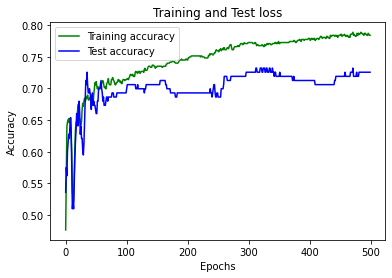

In [63]:
train(500, 0.001)

The test accuracy is the same as in the previous example, though the train accuracy has lowered 78% vs 86%.

Now, for a lower number of epochs:

C:\Users\Denny\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.660162627696991 Test Accuracy: 0.6143791079521179
Epoch 20) Train Accuracy: 0.5333333611488342 Test Accuracy: 0.5555555820465088
Epoch 30) Train Accuracy: 0.6747967600822449 Test Accuracy: 0.6470588445663452
Epoch 40) Train Accuracy: 0.6747967600822449 Test Accuracy: 0.6470588445663452
Epoch 50) Train Accuracy: 0.6845528483390808 Test Accuracy: 0.6470588445663452
Epoch 60) Train Accuracy: 0.7040650248527527 Test Accuracy: 0.673202633857727
Epoch 70) Train Accuracy: 0.6910569071769714 Test Accuracy: 0.6797385811805725
Epoch 80) Train Accuracy: 0.7056910395622253 Test Accuracy: 0.673202633857727
Epoch 90) Train Accuracy: 0.7105690836906433 Test Accuracy: 0.6666666865348816
Epoch 100) Train Accuracy: 0.712195098400116 Test Accuracy: 0.6666666865348816
Epoch 110) Train Accuracy: 0.712195098400116 Test Accuracy: 0.6535947918891907
Epoch 120) Train Accuracy: 0.712195098400116 Test Accuracy: 0.6601307392120361
Epoch 130) Train Accuracy: 0.7154471278190613 Test Accu

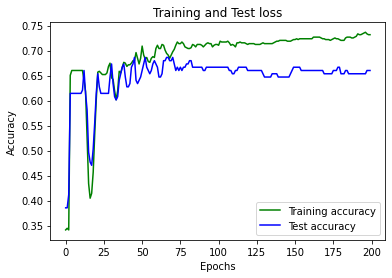

In [64]:
train(200, 0.001)

The results are worse than with the learning rate 0.01 for 200 epochs.

C:\Users\Denny\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.38211381435394287 Test Accuracy: 0.35947713255882263
Epoch 20) Train Accuracy: 0.6406503915786743 Test Accuracy: 0.6339869499206543
Epoch 30) Train Accuracy: 0.5512195229530334 Test Accuracy: 0.48366013169288635
Epoch 40) Train Accuracy: 0.6731707453727722 Test Accuracy: 0.6535947918891907
Epoch 50) Train Accuracy: 0.6731707453727722 Test Accuracy: 0.6797385811805725
Epoch 60) Train Accuracy: 0.70243901014328 Test Accuracy: 0.6209150552749634
Epoch 70) Train Accuracy: 0.7138211131095886 Test Accuracy: 0.6601307392120361
Epoch 80) Train Accuracy: 0.7268292903900146 Test Accuracy: 0.6535947918891907
Epoch 90) Train Accuracy: 0.725203275680542 Test Accuracy: 0.6797385811805725
Epoch 100) Train Accuracy: 0.73008131980896 Test Accuracy: 0.6797385811805725


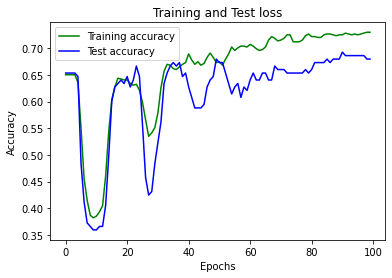

In [65]:
train(100, 0.001)

We see that with for 200 and 100 epochs a lower learning rate gives worse results. Let's prove that point by lowering it even more:

C:\Users\Denny\AppData\Local\Programs\Python\Python39\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 20) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 30) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 40) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 50) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 60) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 70) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 80) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 90) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499
Epoch 100) Train Accuracy: 0.33821138739585876 Test Accuracy: 0.3921568691730499


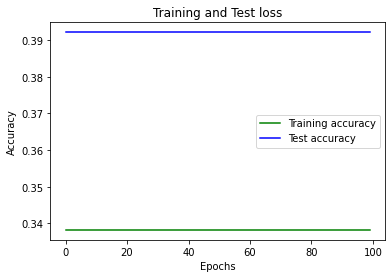

In [66]:
train(100, 0.00001)

That result is expected to be bad, though not **that** bad.

Anyway, looks like training with 500 epochs gives the best results in this case. The best one we've got is 78% for train and 72% for test.